In [1]:
import pandas as pd
df_h = pd.read_csv('./ObsData/hidrogen_table_ronnyatoche.csv')
print(df_h.head())
print(df_h.shape)

           specObjID         z  fiberMag_r         ew     ewErr
0  77910042136805376  0.096130    18.17295   1.202041  0.137201
1  77910042229080064  0.039676    18.47620  13.026290  0.198288
2  77910042371686400  0.067797    19.06306  13.879700  0.264646
3  77910042954694656  0.163473    18.79033  11.662550  0.412270
4  77910043105689600  0.083165    19.50517  11.128130  0.319213
(440288, 5)


In [2]:
df_n = pd.read_csv('./ObsData/nitrogen_table_ronnyatoche.csv')
print(df_n.head())
print(df_n.shape)

            specObjID         z  fiberMag_r         ew     ewErr
0  111968019445448704  0.044624    17.25153   1.872691  0.137486
1  111968019911016448  0.068594    18.34439   4.705816  0.187338
2  111968019994902528  0.017880    18.99348   1.718214  0.179890
3  111968020628242432  0.062302    18.84963  12.000500  0.295785
4  111968020787625984  0.061285    18.91270   5.847309  0.249796
(532019, 5)


In [3]:
df_h = df_h.rename(columns={'ew':'ew_h'})
df_n = df_n.rename(columns={'ew':'ew_n'})
df_h.head()


,specObjID,z,fiberMag_r,ew_h,ewErr
0,77910042136805376,0.096130,18.17295,1.202041,0.137201
1,77910042229080064,0.039676,18.47620,13.026290,0.198288
2,77910042371686400,0.067797,19.06306,13.879700,0.264646
3,77910042954694656,0.163473,18.79033,11.662550,0.412270
4,77910043105689600,0.083165,19.50517,11.128130,0.319213


In [4]:
df_n.head()


,specObjID,z,fiberMag_r,ew_n,ewErr
0,111968019445448704,0.044624,17.25153,1.872691,0.137486
1,111968019911016448,0.068594,18.34439,4.705816,0.187338
2,111968019994902528,0.017880,18.99348,1.718214,0.179890
3,111968020628242432,0.062302,18.84963,12.000500,0.295785
4,111968020787625984,0.061285,18.91270,5.847309,0.249796


In [5]:
df_h.dtypes

specObjID       int64
z             float64
fiberMag_r    float64
ew_h          float64
ewErr         float64
dtype: object

In [6]:
result = pd.merge(df_h,df_n, on="specObjID", how="left")
result.head() 

,specObjID,z_x,fiberMag_r_x,ew_h,ewErr_x,z_y,fiberMag_r_y,ew_n,ewErr_y
0,77910042136805376,0.096130,18.17295,1.202041,0.137201,0.096130,18.17295,3.691171,0.147553
1,77910042229080064,0.039676,18.47620,13.026290,0.198288,0.039676,18.47620,5.278912,0.155058
2,77910042371686400,0.067797,19.06306,13.879700,0.264646,0.067797,19.06306,4.977230,0.193421
3,77910042954694656,0.163473,18.79033,11.662550,0.412270,0.163473,18.79033,12.802080,0.343948
4,77910043105689600,0.083165,19.50517,11.128130,0.319213,0.083165,19.50517,4.903978,0.289031


In [7]:
import math 
ope = result["ew_n"] / result["ew_h"]
result["ew_ratio"] = ope
result.head()

,specObjID,z_x,fiberMag_r_x,ew_h,ewErr_x,z_y,fiberMag_r_y,ew_n,ewErr_y,ew_ratio
0,77910042136805376,0.096130,18.17295,1.202041,0.137201,0.096130,18.17295,3.691171,0.147553,3.070753
1,77910042229080064,0.039676,18.47620,13.026290,0.198288,0.039676,18.47620,5.278912,0.155058,0.405251
2,77910042371686400,0.067797,19.06306,13.879700,0.264646,0.067797,19.06306,4.977230,0.193421,0.358598
3,77910042954694656,0.163473,18.79033,11.662550,0.412270,0.163473,18.79033,12.802080,0.343948,1.097708
4,77910043105689600,0.083165,19.50517,11.128130,0.319213,0.083165,19.50517,4.903978,0.289031,0.440683


In [8]:
def ox_ab(x):
    return 8.9 + 0.57*math.log( x ,10)
result["ox_abund"] = result[["ew_ratio"]].apply(ox_ab, axis=1)
result.head()

,specObjID,z_x,fiberMag_r_x,ew_h,ewErr_x,z_y,fiberMag_r_y,ew_n,ewErr_y,ew_ratio,ox_abund
0,77910042136805376,0.096130,18.17295,1.202041,0.137201,0.096130,18.17295,3.691171,0.147553,3.070753,9.177730
1,77910042229080064,0.039676,18.47620,13.026290,0.198288,0.039676,18.47620,5.278912,0.155058,0.405251,8.676402
2,77910042371686400,0.067797,19.06306,13.879700,0.264646,0.067797,19.06306,4.977230,0.193421,0.358598,8.646126
3,77910042954694656,0.163473,18.79033,11.662550,0.412270,0.163473,18.79033,12.802080,0.343948,1.097708,8.923078
4,77910043105689600,0.083165,19.50517,11.128130,0.319213,0.083165,19.50517,4.903978,0.289031,0.440683,8.697152


In [9]:
result = result.drop(["fiberMag_r_y", "ewErr_y", "z_y", "ewErr_x"],axis=1)
result.head()

,specObjID,z_x,fiberMag_r_x,ew_h,ew_n,ew_ratio,ox_abund
0,77910042136805376,0.096130,18.17295,1.202041,3.691171,3.070753,9.177730
1,77910042229080064,0.039676,18.47620,13.026290,5.278912,0.405251,8.676402
2,77910042371686400,0.067797,19.06306,13.879700,4.977230,0.358598,8.646126
3,77910042954694656,0.163473,18.79033,11.662550,12.802080,1.097708,8.923078
4,77910043105689600,0.083165,19.50517,11.128130,4.903978,0.440683,8.697152


In [10]:
result = result.rename(columns = {'z_x':'z', 'fiberMag_r_x':'fiberMag_r'})
result.head()

,specObjID,z,fiberMag_r,ew_h,ew_n,ew_ratio,ox_abund
0,77910042136805376,0.096130,18.17295,1.202041,3.691171,3.070753,9.177730
1,77910042229080064,0.039676,18.47620,13.026290,5.278912,0.405251,8.676402
2,77910042371686400,0.067797,19.06306,13.879700,4.977230,0.358598,8.646126
3,77910042954694656,0.163473,18.79033,11.662550,12.802080,1.097708,8.923078
4,77910043105689600,0.083165,19.50517,11.128130,4.903978,0.440683,8.697152


In [11]:
result.shape

(440288, 7)

In [12]:
from astropy import cosmology
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
cosmo.luminosity_distance(4).value


35851.83207231648

In [13]:
def dz(x):
    return cosmo.luminosity_distance(x).value
result["dz"] = result[["z"]].apply(dz, axis=1)
result.head()

,specObjID,z,fiberMag_r,ew_h,ew_n,ew_ratio,ox_abund,dz
0,77910042136805376,0.096130,18.17295,1.202041,3.691171,3.070753,9.177730,[441.338306149]
1,77910042229080064,0.039676,18.47620,13.026290,5.278912,0.405251,8.676402,[175.075998092]
2,77910042371686400,0.067797,19.06306,13.879700,4.977230,0.358598,8.646126,[305.251863115]
3,77910042954694656,0.163473,18.79033,11.662550,12.802080,1.097708,8.923078,[783.744189444]
4,77910043105689600,0.083165,19.50517,11.128130,4.903978,0.440683,8.697152,[378.457781847]


In [14]:
result.dtypes

specObjID       int64
z             float64
fiberMag_r    float64
ew_h          float64
ew_n          float64
ew_ratio      float64
ox_abund      float64
dz             object
dtype: object

In [15]:
result['dz'] = result['dz'].astype(str)
result.dtypes

specObjID       int64
z             float64
fiberMag_r    float64
ew_h          float64
ew_n          float64
ew_ratio      float64
ox_abund      float64
dz             object
dtype: object

In [16]:
result['dz'] = [float(str(val).replace(' ','').replace('[','').replace(']','')) for val in result['dz'].values]
result.head()

,specObjID,z,fiberMag_r,ew_h,ew_n,ew_ratio,ox_abund,dz
0,77910042136805376,0.096130,18.17295,1.202041,3.691171,3.070753,9.177730,441.338306
1,77910042229080064,0.039676,18.47620,13.026290,5.278912,0.405251,8.676402,175.075998
2,77910042371686400,0.067797,19.06306,13.879700,4.977230,0.358598,8.646126,305.251863
3,77910042954694656,0.163473,18.79033,11.662550,12.802080,1.097708,8.923078,783.744189
4,77910043105689600,0.083165,19.50517,11.128130,4.903978,0.440683,8.697152,378.457782


In [17]:
result.dtypes

specObjID       int64
z             float64
fiberMag_r    float64
ew_h          float64
ew_n          float64
ew_ratio      float64
ox_abund      float64
dz            float64
dtype: object

In [18]:
result['fiberMag_r'][1]

18.476199999999999

In [19]:
result.shape

(440288, 8)

In [20]:
result = result[result['dz']>0]
result.shape

(439905, 8)

In [21]:
def log_dz(x):
    return math.log( x ,10)
result["log_dz"] = result[["dz"]].apply(log_dz, axis=1)
result.head()

,specObjID,z,fiberMag_r,ew_h,ew_n,ew_ratio,ox_abund,dz,log_dz
0,77910042136805376,0.096130,18.17295,1.202041,3.691171,3.070753,9.177730,441.338306,2.644772
1,77910042229080064,0.039676,18.47620,13.026290,5.278912,0.405251,8.676402,175.075998,2.243227
2,77910042371686400,0.067797,19.06306,13.879700,4.977230,0.358598,8.646126,305.251863,2.484658
3,77910042954694656,0.163473,18.79033,11.662550,12.802080,1.097708,8.923078,783.744189,2.894174
4,77910043105689600,0.083165,19.50517,11.128130,4.903978,0.440683,8.697152,378.457782,2.578017


In [22]:
result.reset_index()
result.head()

,specObjID,z,fiberMag_r,ew_h,ew_n,ew_ratio,ox_abund,dz,log_dz
0,77910042136805376,0.096130,18.17295,1.202041,3.691171,3.070753,9.177730,441.338306,2.644772
1,77910042229080064,0.039676,18.47620,13.026290,5.278912,0.405251,8.676402,175.075998,2.243227
2,77910042371686400,0.067797,19.06306,13.879700,4.977230,0.358598,8.646126,305.251863,2.484658
3,77910042954694656,0.163473,18.79033,11.662550,12.802080,1.097708,8.923078,783.744189,2.894174
4,77910043105689600,0.083165,19.50517,11.128130,4.903978,0.440683,8.697152,378.457782,2.578017


In [23]:
result['ab_mag_r'] = (result['fiberMag_r'])-25-5*(result['log_dz'])
result.head()

,specObjID,z,fiberMag_r,ew_h,ew_n,ew_ratio,ox_abund,dz,log_dz,ab_mag_r
0,77910042136805376,0.096130,18.17295,1.202041,3.691171,3.070753,9.177730,441.338306,2.644772,-20.050908
1,77910042229080064,0.039676,18.47620,13.026290,5.278912,0.405251,8.676402,175.075998,2.243227,-17.739933
2,77910042371686400,0.067797,19.06306,13.879700,4.977230,0.358598,8.646126,305.251863,2.484658,-18.360232
3,77910042954694656,0.163473,18.79033,11.662550,12.802080,1.097708,8.923078,783.744189,2.894174,-20.680542
4,77910043105689600,0.083165,19.50517,11.128130,4.903978,0.440683,8.697152,378.457782,2.578017,-18.384917


In [24]:
result.dtypes

specObjID       int64
z             float64
fiberMag_r    float64
ew_h          float64
ew_n          float64
ew_ratio      float64
ox_abund      float64
dz            float64
log_dz        float64
ab_mag_r      float64
dtype: object

In [25]:
result.shape

(439905, 10)

In [26]:
result.describe()

,specObjID,z,fiberMag_r,ew_h,ew_n,ew_ratio,ox_abund,dz,log_dz,ab_mag_r
count,4.399050e+05,4.399050e+05,438495.000000,439905.000000,425972.000000,425972.000000,425972.000000,439905.000000,439905.000000,438495.000000
mean,3.989691e+17,9.958512e-02,17.773706,20.127027,7.715124,0.633890,8.727807,467.776307,2.580854,-20.135617
std,2.046874e+17,5.854048e-02,102.602479,37.343565,7.684810,0.568104,0.165627,319.579289,0.310074,102.603206
min,7.509397e+16,2.768460e-07,-9999.000000,0.043715,0.330860,0.002125,7.376546,0.001186,-2.926040,-10039.153572
25%,2.223086e+17,6.004580e-02,18.442490,6.410007,3.818233,0.356576,8.644727,268.875086,2.429551,-20.138573
50%,3.900709e+17,9.007770e-02,18.840260,13.926530,6.035045,0.460764,8.708183,411.858580,2.614748,-19.383289
75%,5.626165e+17,1.307370e-01,19.223140,25.465430,9.624474,0.701002,8.812060,614.044912,2.788200,-18.379281
max,8.373411e+17,4.884630e+00,23.644540,10000.000000,2686.413000,56.716541,9.899615,45390.706617,4.656967,8.462747


In [27]:
result.sort_values(by='ab_mag_r', ascending=True)

,specObjID,z,fiberMag_r,ew_h,ew_n,ew_ratio,ox_abund,dz,log_dz,ab_mag_r
202746,106621507072950272,0.216896,-9999.0,5.073206,3.400832,0.670352,8.800993,1073.283371,3.030714,-10039.153572
228029,465789384055062528,0.194087,-9999.0,20.683890,10.356780,0.500717,8.728768,947.800516,2.976717,-10038.883585
176260,466352485347360768,0.172739,-9999.0,8.471127,10.059980,1.187561,8.942554,832.862082,2.920573,-10038.602865
341850,604556519614185472,0.168110,-9999.0,15.390120,7.086919,0.460485,8.708033,808.265426,2.907554,-10038.537770
88713,102680232460288000,0.165160,-9999.0,4.988418,6.082249,1.219274,8.949078,792.651629,2.899082,-10038.495412
235289,466070966938632192,0.154010,-9999.0,44.606200,29.353470,0.658058,8.796411,734.071193,2.865738,-10038.328691
231305,467195582155325440,0.152790,-9999.0,12.690650,20.637850,1.626225,9.020373,727.703450,2.861954,-10038.309772
128691,216115728078602240,0.152017,-9999.0,5.939813,3.951783,0.665304,8.799122,723.673110,2.859542,-10038.297712
421263,106621508255744000,0.143337,-9999.0,4.680719,9.827339,2.099536,9.083610,678.646773,2.831644,-10038.158219
167137,116753418097262592,0.133206,-9999.0,31.572590,17.230990,0.545758,8.750090,626.632477,2.797013,-10037.985064


In [28]:
count_NaN = result.isna().sum()
print(count_NaN)

specObjID         0
z                 0
fiberMag_r     1410
ew_h              0
ew_n          13933
ew_ratio      13933
ox_abund      13933
dz                0
log_dz            0
ab_mag_r       1410
dtype: int64


In [29]:
result.dropna()

,specObjID,z,fiberMag_r,ew_h,ew_n,ew_ratio,ox_abund,dz,log_dz,ab_mag_r
0,77910042136805376,0.096130,18.17295,1.202041,3.691171,3.070753,9.177730,441.338306,2.644772,-20.050908
1,77910042229080064,0.039676,18.47620,13.026290,5.278912,0.405251,8.676402,175.075998,2.243227,-17.739933
2,77910042371686400,0.067797,19.06306,13.879700,4.977230,0.358598,8.646126,305.251863,2.484658,-18.360232
3,77910042954694656,0.163473,18.79033,11.662550,12.802080,1.097708,8.923078,783.744189,2.894174,-20.680542
4,77910043105689600,0.083165,19.50517,11.128130,4.903978,0.440683,8.697152,378.457782,2.578017,-18.384917
5,77910043478982656,0.118737,18.87039,6.774915,4.502785,0.664626,8.798869,553.365829,2.743012,-19.844672
6,77910043571257344,0.147087,18.64308,23.136280,8.940736,0.386438,8.664635,698.047400,2.843885,-20.576345
7,77910043629977600,0.103283,19.06304,28.482300,9.845634,0.345676,8.637041,476.456940,2.678024,-19.327078
8,77910043655143424,0.084613,19.43973,6.086303,3.205124,0.526613,8.741250,385.433302,2.585949,-18.490016
9,78191511828692992,0.112670,18.23006,10.800580,8.592798,0.795587,8.843392,523.005575,2.718506,-20.362472


In [30]:
result.describe()

,specObjID,z,fiberMag_r,ew_h,ew_n,ew_ratio,ox_abund,dz,log_dz,ab_mag_r
count,4.399050e+05,4.399050e+05,438495.000000,439905.000000,425972.000000,425972.000000,425972.000000,439905.000000,439905.000000,438495.000000
mean,3.989691e+17,9.958512e-02,17.773706,20.127027,7.715124,0.633890,8.727807,467.776307,2.580854,-20.135617
std,2.046874e+17,5.854048e-02,102.602479,37.343565,7.684810,0.568104,0.165627,319.579289,0.310074,102.603206
min,7.509397e+16,2.768460e-07,-9999.000000,0.043715,0.330860,0.002125,7.376546,0.001186,-2.926040,-10039.153572
25%,2.223086e+17,6.004580e-02,18.442490,6.410007,3.818233,0.356576,8.644727,268.875086,2.429551,-20.138573
50%,3.900709e+17,9.007770e-02,18.840260,13.926530,6.035045,0.460764,8.708183,411.858580,2.614748,-19.383289
75%,5.626165e+17,1.307370e-01,19.223140,25.465430,9.624474,0.701002,8.812060,614.044912,2.788200,-18.379281
max,8.373411e+17,4.884630e+00,23.644540,10000.000000,2686.413000,56.716541,9.899615,45390.706617,4.656967,8.462747


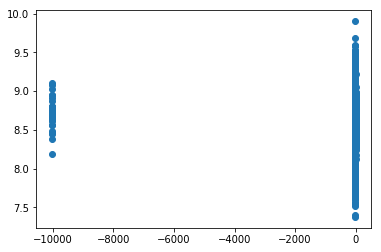

In [31]:
import matplotlib.pyplot as plt
plt.scatter(result["ab_mag_r"],result["ox_abund"])
plt.show()

In [32]:
result_loc = result.loc[result['ab_mag_r'] > -200]
result_loc.describe()

,specObjID,z,fiberMag_r,ew_h,ew_n,ew_ratio,ox_abund,dz,log_dz,ab_mag_r
count,4.384490e+05,4.384490e+05,438449.000000,438449.000000,424633.000000,424633.000000,424633.000000,438449.000000,438449.000000,438449.000000
mean,3.994100e+17,9.970009e-02,18.824619,20.100435,7.712712,0.634238,8.728010,468.332458,2.581882,-19.084792
std,2.047228e+17,5.852491e-02,0.700521,37.335162,7.681052,0.568107,0.165507,319.621683,0.308763,1.548878
min,7.509397e+16,2.768460e-07,14.782850,0.043715,0.330860,0.002125,7.376546,0.001186,-2.926040,-30.938940
25%,2.225904e+17,6.017880e-02,18.442650,6.403709,3.818153,0.356809,8.644889,269.496080,2.430552,-20.138325
50%,3.906339e+17,9.018720e-02,18.840320,13.914360,6.034258,0.460988,8.708303,412.389950,2.615308,-19.383130
75%,5.631797e+17,1.308240e-01,19.223190,25.441910,9.621136,0.701482,8.812230,614.487865,2.788513,-18.379163
max,8.373411e+17,4.884630e+00,23.644540,10000.000000,2686.413000,56.716541,9.899615,45390.706617,4.656967,8.462747


/Software/users/modules/7/software/anaconda3/4.2.0/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


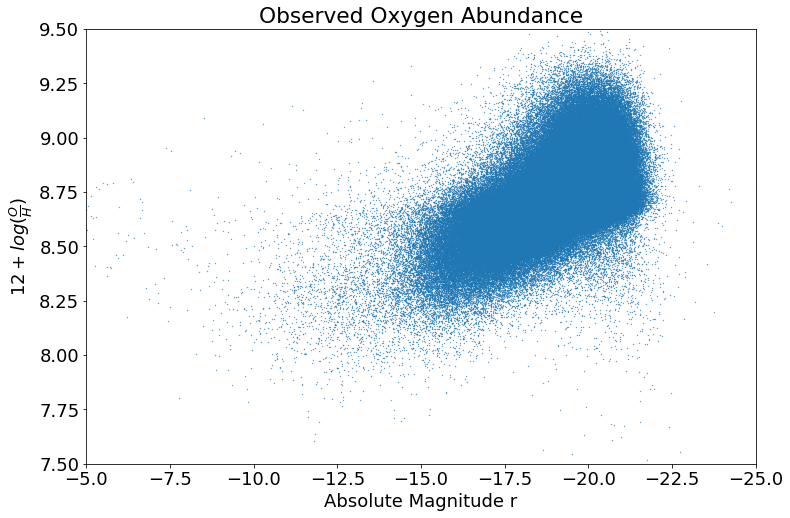

In [48]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
font = {'family' : 'normal',
        'size'   : 18}
plt.rc('font', **font)
figure(figsize=(12, 8))

plt.scatter(result_loc["ab_mag_r"],result_loc["ox_abund"], s=0.1)
plt.gca().invert_xaxis()

plt.xlim(-5, -25 )
plt.ylim(7.5, 9.5)
plt.xlabel(r'Absolute Magnitude r')
plt.ylabel(r'$12+log(\frac{O}{H})$')
plt.title('Observed Oxygen Abundance')
#plt.legend()
plt.show()